In [1]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Fafcom/Downloads/leavemng.machine-attandances.csv")
df.head()

C:\Users\Fafcom\AppData\Local\Temp\ipykernel_5552\1519935802.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Fafcom/Downloads/leavemng.machine-attandances.csv")


_id  employeeId  machineId  login  location.latitude  \
0  65868bee14370b3a22f6bab8    10002037     1001.0  False          24.402130   
1  65868ec214370b3a22f6bb15    10002010     1001.0  False          24.402100   
2  658694ac14370b3a22f6bb40    10002037     1001.0  False          24.402198   
3  6586964a14370b3a22f6bb68    10002010     1001.0  False          24.402203   
4  658bc63487b29a789b492286    10002037     1001.0  False          24.430696   

   location.longitude                                             selfie  \
0           56.666842  1703316462543-85183742-4601-4fd5-94ce-f93f7e44...   
1           56.666855  1703317186271-203849fb-cba5-4dbf-97f2-14bb5f94...   
2           56.666801  1703318699669-d29cee40-9f33-4827-a4fc-597b6efa...   
3           56.666710  1703319113670-422f7d77-9832-4c10-ac1f-38de4df9...   
4           56.576431  1703659059806-f54239f1-6cb6-4fc0-a22a-3a3e0828...   

                      loginAt  isCompleted  __v  
0  2023-12-23T11:27:36.495887        False  0.0  
1  2023-12-23T11:39:40.606083        False  0.0  
2  2023-12-23T12:04:43.049688         True  0.0  
3  2023-12-23T12:11:42.454649         True  0.0  
4  2023-12-27T10:37:34.167756        False  0.0

In [3]:
# 2. Handle NaN values - Example: Fill with the mean
df['location.latitude'].fillna(df['location.latitude'].mean(), inplace=True)
df['location.longitude'].fillna(df['location.longitude'].mean(), inplace=True)

C:\Users\Fafcom\AppData\Local\Temp\ipykernel_5552\848802376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location.latitude'].fillna(df['location.latitude'].mean(), inplace=True)
C:\Users\Fafcom\AppData\Local\Temp\ipykernel_5552\848802376.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [8]:
from geopy.distance import geodesic
import numpy as np
# Define your fixed office location
office_location = (24.434181, 56.580044)  # Example coordinates of your office

# Calculate the distance of each login location from the office
df['login_location'] = df.apply(lambda row: (row['location.latitude'], row['location.longitude']), axis=1)
df['distance_from_office'] = df['login_location'].apply(lambda x: geodesic(office_location, x).km)

# Define a threshold for normal logins (e.g., 0.5 km)
distance_threshold = 8
df['anomaly'] = np.where(df['distance_from_office'] > distance_threshold, 1, 0)  # 1 for anomaly, 0 for normal

<Axes: xlabel='distance_from_office', ylabel='Count'>

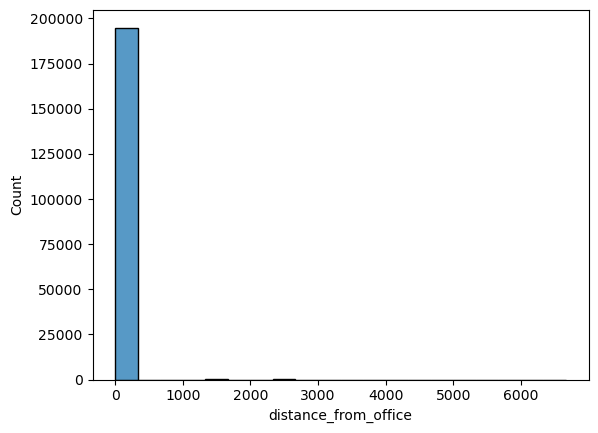

In [14]:
import plotly.express as px
# Create a histogram using Plotly
sns.histplot(df, 
                   x='distance_from_office',
                   bins=20, 
                   # title='Distribution of Distances from Office',
                   # labels={'distance_from_office': 'Distance from Office (km)'},
                   # template='plotly_white'
            )

# # Update layout for better visualization
# fig.update_layout(
#     xaxis_title='Distance from Office (km)',
#     yaxis_title='Frequency',
#     bargap=0.2  # Adjusts the gap between bars
# )

# # Show the plot
# fig.show()

In [ ]:
df.head()

In [16]:
# Import required libraries
import pandas as pd
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Split the data into features and target
X = df[['location.latitude', 'location.longitude', 'distance_from_office']]
y = df['anomaly']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create the XGBoost classifier
xg= XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on the resampled training data
xg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


C:\Users\Fafcom\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38915
           1       1.00      1.00      1.00       131

    accuracy                           1.00     39046
   macro avg       1.00      1.00      1.00     39046
weighted avg       1.00      1.00      1.00     39046



In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xg, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

C:\Users\Fafcom\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Fafcom\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Fafcom\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:19:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Fafcom\anaconda3\Lib\site-packa

Cross-Validation Scores: [0.99941095 0.99964145 0.99979511 0.99989756 0.99994878]
Mean Cross-Validation Score: 0.9997387693939306


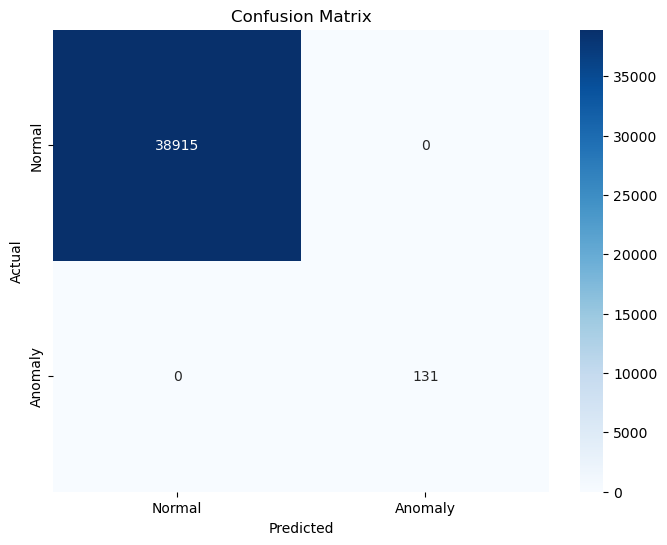

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [249]:
import joblib
# Save the model
joblib.dump(xg, 'xgboost_model.pkl')

['xgboost_model.pkl']